# **Atividade 1 (Ajuste de Curvas)**

A tabela [Embalagens](https://drive.google.com/file/d/1_MtJrJmrDbKMKUbdG9xnokc5002X9JY-/view?usp=drive_link) é uma amostra do resultado de um estudo sobre a relação entre a duração de certas operações (segundos) para embalar determinados objetos e o volume que eles ocupam (em dm³).

a) Crie um código em Python para fazer o diagrama de dispersão desses dados.

b) Crie um código em Python para fazer um ajuste do tipo Regressão Linear aos dados dispostos no diagrama.

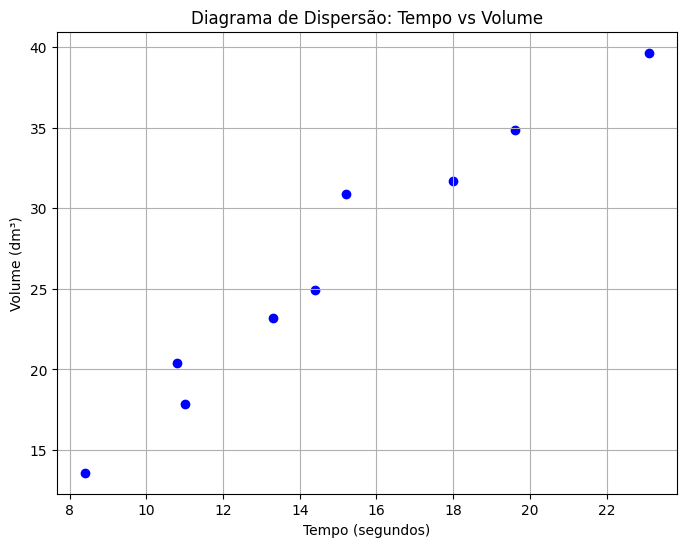

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset
file_path = 'Embalagens.csv'
embalagens_data = pd.read_csv(file_path, delimiter=';')

# Diagrama de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(embalagens_data['Tempo'], embalagens_data['Volume'], color='blue')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Volume (dm³)')
plt.title('Diagrama de Dispersão: Tempo vs Volume')
plt.grid(True)
plt.show()


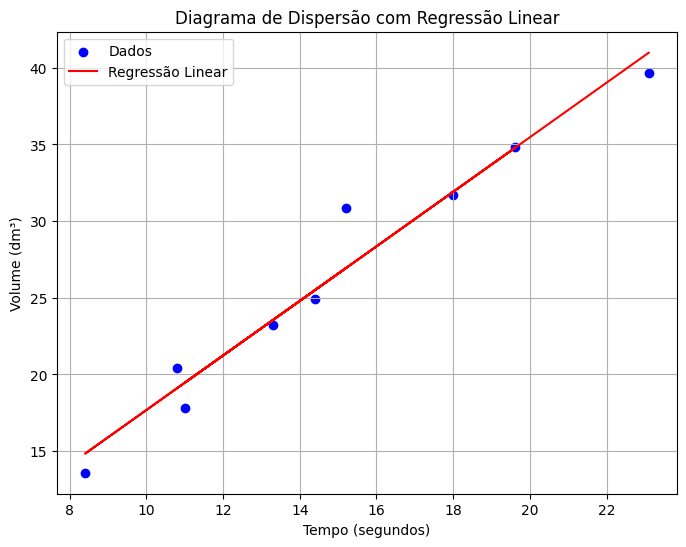

Coeficiente angular (slope): 1.7788207457883776
Intercepto (intercept): -0.10735730960943357


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Preparar os dados para a regressão linear
X = embalagens_data['Tempo'].values.reshape(-1, 1)
y = embalagens_data['Volume'].values

# Criar e ajustar o modelo de regressão linear
linear_model = LinearRegression()
linear_model.fit(X, y)

# Prever valores para a linha de regressão
y_pred = linear_model.predict(X)

# Plotar o diagrama de dispersão com a linha de regressão
plt.figure(figsize=(8, 6))
plt.scatter(embalagens_data['Tempo'], embalagens_data['Volume'], color='blue', label='Dados')
plt.plot(embalagens_data['Tempo'], y_pred, color='red', label='Regressão Linear')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Volume (dm³)')
plt.title('Diagrama de Dispersão com Regressão Linear')
plt.legend()
plt.grid(True)
plt.show()

# Exibir os coeficientes da regressão
slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print("Coeficiente angular (slope):", slope)
print("Intercepto (intercept):", intercept)


# **Atividade 2 (Regra dos Trapézios)**

Crie uma função chamada *trapezio* em Python que, inseridas uma função $f(x)$, um intervalo $[a , b]$ e o número $n$ de subdivisões, a função *trapezio(f,a,b,n)* calcula valor de $\int_a^b f(x)dx$ utilizando a Regra dos Trapézios.



In [ ]:
import numpy as np

def trapezio(f, a, b, n):
    """
    Calcula o valor aproximado da integral de f(x) no intervalo [a, b]
    usando a Regra dos Trapézios com n subdivisões.

    Parâmetros:
    f : função que será integrada
    a : limite inferior do intervalo de integração
    b : limite superior do intervalo de integração
    n : número de subdivisões

    Retorna:
    Aproximação da integral de f(x) no intervalo [a, b].
    """
    # Calcula a largura de cada subintervalo
    h = (b - a) / n

    # Soma os valores nos extremos
    integral = (f(a) + f(b)) / 2

    # Soma os valores nos pontos intermediários
    for i in range(1, n):
        integral += f(a + i * h)

    # Multiplica pela largura do subintervalo
    integral *= h
    return integral


# **Atividade 3 (Regra de Simpson)**

Crie uma função chamada *simpson* em Python que, inseridas uma função $f(x)$, um intervalo $[a,b]$ e o número $n$ de subdivisões, a função *simpson(f,a,b,n)* calcula valor de $\int_a^bf(x)dx$ utilizando a Regra de Simpson.


In [ ]:
import numpy as np

def simpson(f, a, b, n):
    """
    Calcula o valor aproximado da integral de f(x) no intervalo [a, b]
    usando a Regra de Simpson com n subdivisões (n deve ser par).

    Parâmetros:
    f : função que será integrada
    a : limite inferior do intervalo de integração
    b : limite superior do intervalo de integração
    n : número de subdivisões (deve ser par)

    Retorna:
    Aproximação da integral de f(x) no intervalo [a, b].
    """
    if n % 2 != 0:
        raise ValueError("O número de subdivisões 'n' deve ser par.")

    # Calcula a largura de cada subintervalo
    h = (b - a) / n

    # Soma os valores nos extremos
    integral = f(a) + f(b)

    # Soma os valores nos pontos intermediários, diferenciando múltiplos de 2
    for i in range(1, n):
        x = a + i * h
        if i % 2 == 0:  # Termos com coeficiente 2
            integral += 2 * f(x)
        else:           # Termos com coeficiente 4
            integral += 4 * f(x)

    # Multiplica pelo fator (h/3)
    integral *= h / 3
    return integral


# **Atividade 4**

Utilizando os códigos da Regra dos Trapézios e Regra de Simpson que você criou, calcule o valor aproximado das seguintes integrais:

a) $\int_{-10}^{10} \frac{e^{-x^2}}{\sqrt{\pi}}dx$, com $n = 20$.

b) $\int_2^5 \frac{x^2}{\sqrt{1+x^2}}dx$, com $n = 50$.

c) $\int_0^{30} \cos(t^2)dt$, com $n = 48$.


Obs.: Crie um linha de código para cada integral.

In [ ]:
import math

#Item A
f_a = lambda x: math.exp(-x**2) / math.sqrt(math.pi)
result_a_trapezio = trapezio(f_a, -10, 10, 20)
result_a_simpson = simpson(f_a, -10, 10, 20)

print(f"Regro dos Trapézios: {result_a_trapezio}\nRegra de Simpson: {result_a_simpson}\n")

Regro dos Trapézios: 1.0001034463724081
Regra de Simpson: 0.9435667979070802



In [ ]:
#Item B
f_b = lambda x: 2 * x / math.sqrt(1 + x**2)
result_b_trapezio = trapezio(f_b, 1, 5, 50)
result_b_simpson = simpson(f_b, 1, 5, 50)

print(f"Regro dos Trapézios: {result_b_trapezio}\nRegra de Simpson: {result_b_simpson}\n")

Regro dos Trapézios: 7.369242914797003
Regra de Simpson: 7.369611540898285



In [ ]:
#Item C
f_c = lambda t: math.cos(t**2)
result_c_trapezio = trapezio(f_c, 0, 30, 48)
result_c_simpson = simpson(f_c, 0, 30, 48)

print(f"Regro dos Trapézios: {result_c_trapezio}\nRegra de Simpson: {result_c_simpson}\n")

Regro dos Trapézios: 3.720832072370216
Regra de Simpson: 2.5643944479794136

